# Compare different P1D measurements

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 160
mpl.rcParams['figure.dpi'] = 160
from cup1d.data import p1d_data_PD2013
from cup1d.data import p1d_data_Irsic2017
from cup1d.data import p1d_data_Walther2018
from cup1d.data import p1d_data_Chabanier2019

### Read all P1D measurements

In [2]:
keys = ['label','marker','data'] 
datasets = [dict(zip(keys,['I17','o',p1d_data_Irsic2017.P1D_Irsic2017()])),
            dict(zip(keys,['W18','x',p1d_data_Walther2018.P1D_Walther2018()])),
            dict(zip(keys,['C19','*',p1d_data_Chabanier2019.P1D_Chabanier2019()]))]

In [3]:
def combined_plot(datasets,zmin=1.7,zmax=6.0,kmin=0.001,kmax=0.1):
    Ndata=len(datasets)
    for idata in range(Ndata):
        label=datasets[idata]['label']
        marker=datasets[idata]['marker']
        data=datasets[idata]['data']
        k_kms=data.k_kms
        kplot=(k_kms>kmin) & (k_kms<kmax)
        k_kms=k_kms[kplot]
        zs=data.z
        Nz=len(zs)
        for iz in range(Nz):
            z=zs[iz]
            if z < zmin: continue
            if z > zmax: continue
            Pk_kms=data.get_Pk_iz(iz)[kplot]
            err_Pk_kms=np.sqrt(np.diagonal(data.get_cov_iz(iz)))[kplot]    
            fact=k_kms/np.pi
            col = plt.cm.jet((z-zmin)/(zmax-zmin))
            plt.errorbar(k_kms,fact*Pk_kms,
                         color=col,marker=marker,ms=4.5,ls="none",
                         yerr=fact*err_Pk_kms,
                         label=label+' z = {}'.format(z))
    plt.legend()
    plt.yscale('log', nonpositive='clip')
    plt.xscale('log')
    plt.ylabel(r'$k P(k)/ \pi$')

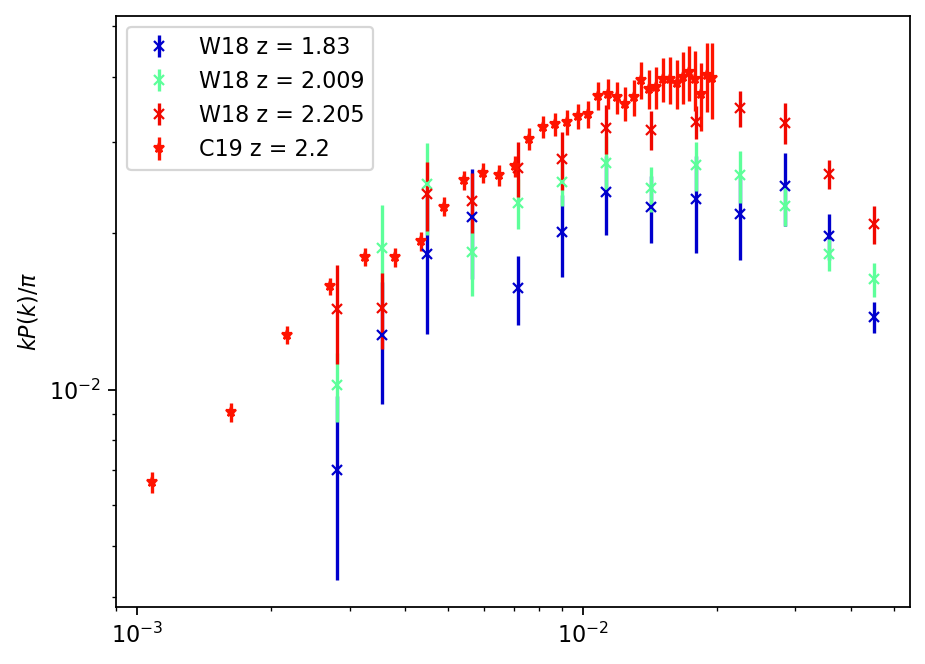

In [4]:
combined_plot(datasets,zmin=1.8,zmax=2.25,kmax=0.05)

### Use code in plot_p1d_data

In [5]:
from cup1d.data import plot_p1d_data

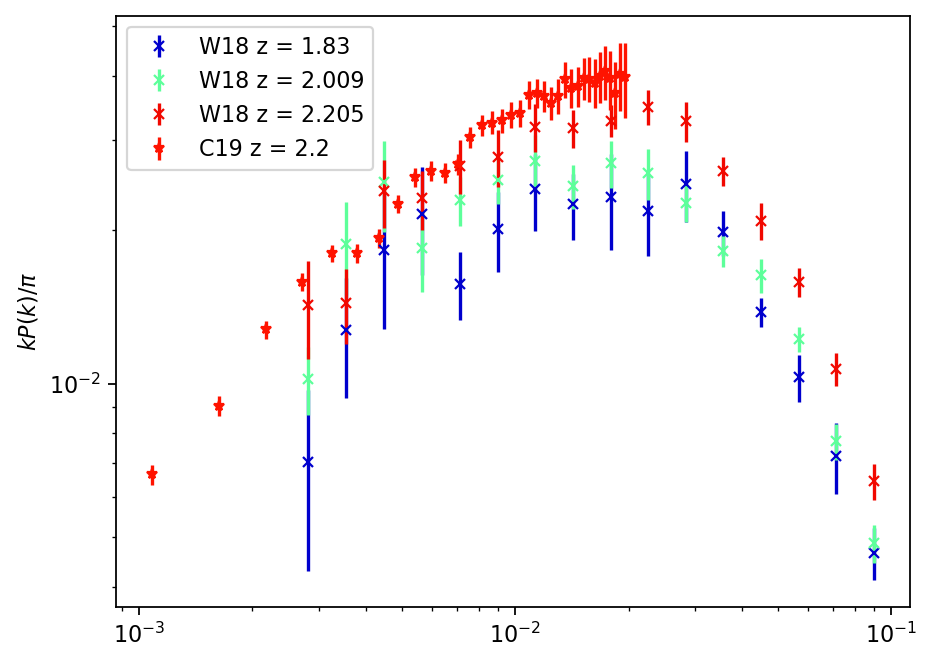

In [6]:
plot_p1d_data.plot_all_p1d(zmin=1.8,zmax=2.25)

### Reproduce Figure 7 of Irsic et al. (2017)

Fig 7 of Irsic et al. (2017) compares PD2013 with Irsic2017, at three different redshifts. We plot them here.

In [7]:
keys = ['label','marker','data'] 
datasets = [dict(zip(keys,['I17','o',p1d_data_Irsic2017.P1D_Irsic2017()])),
            dict(zip(keys,['PD13','*',p1d_data_PD2013.P1D_PD2013()]))]

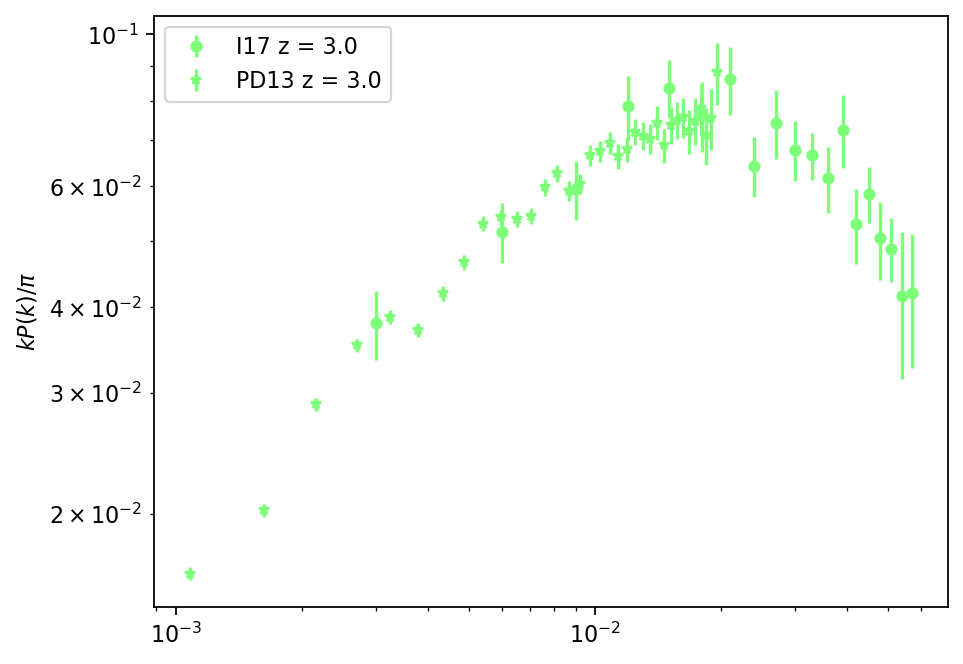

In [8]:
combined_plot(datasets,zmin=2.99,zmax=3.01,kmax=0.065)

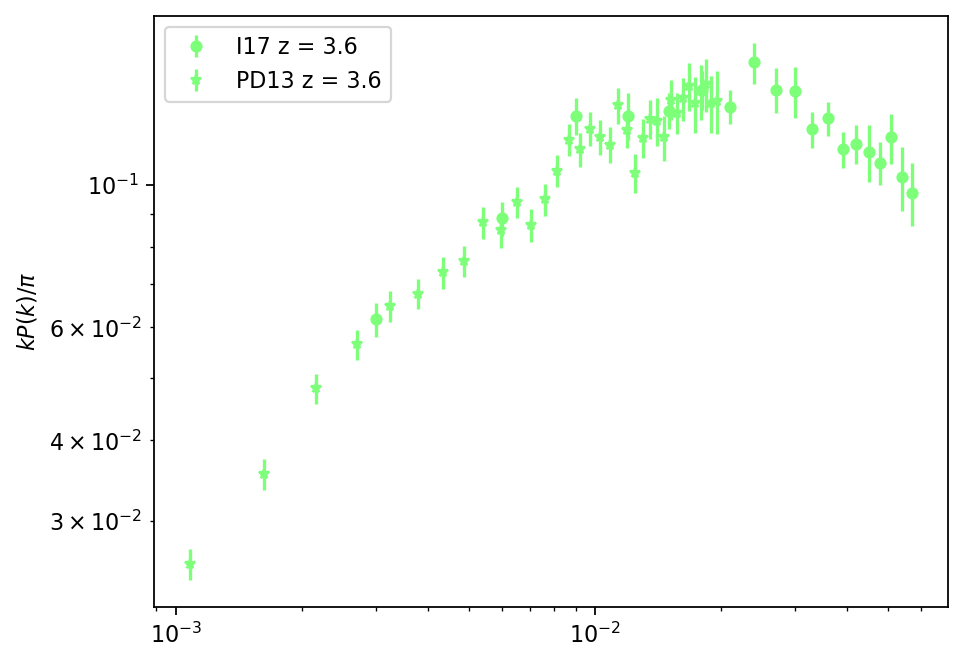

In [9]:
combined_plot(datasets,zmin=3.59,zmax=3.61,kmax=0.065)

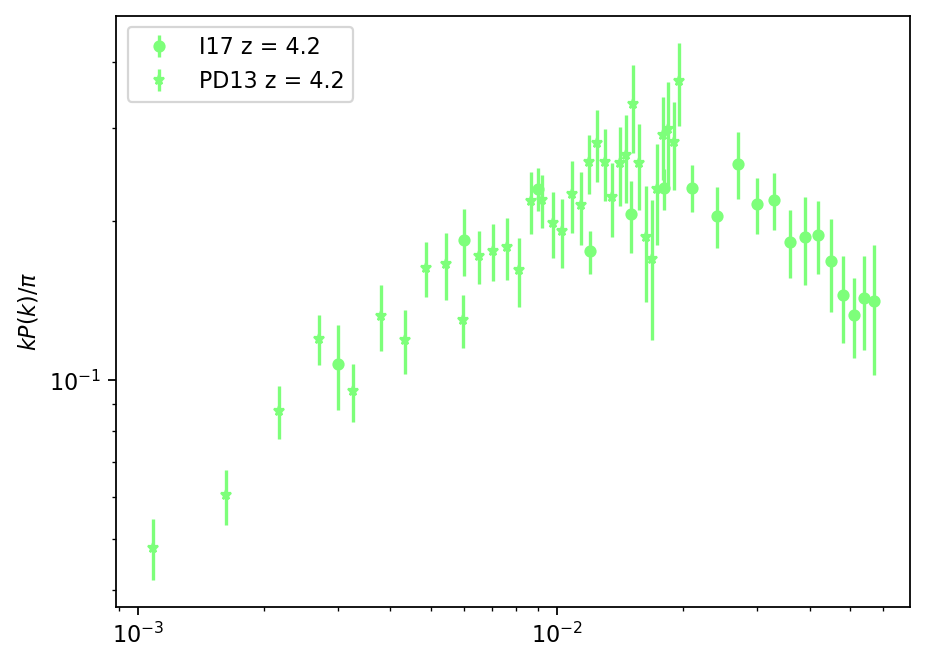

In [10]:
combined_plot(datasets,zmin=4.19,zmax=4.21,kmax=0.065)

### Reproduce Figure 8 of Walther et al. (2018)

Fig 8 of Walther et al. (2018) compares PD2013 with Walther2018, at several redshifts. We plot them here.

In [11]:
keys = ['label','marker','data'] 
datasets = [dict(zip(keys,['W18','o',p1d_data_Walther2018.P1D_Walther2018()])),
            dict(zip(keys,['PD13','*',p1d_data_PD2013.P1D_PD2013()]))]

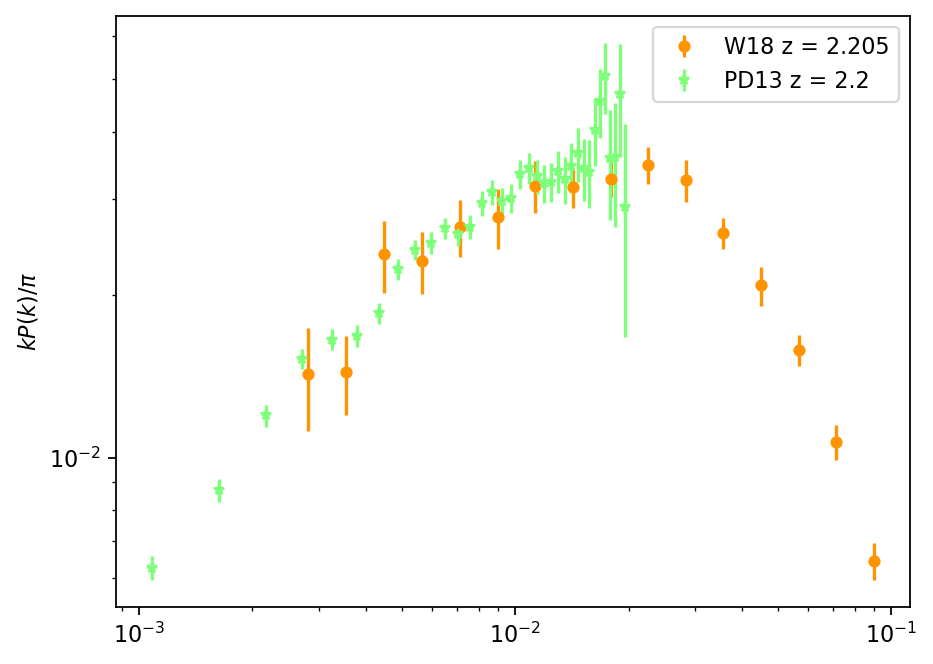

In [12]:
combined_plot(datasets,zmin=2.19,zmax=2.21,kmax=0.11)

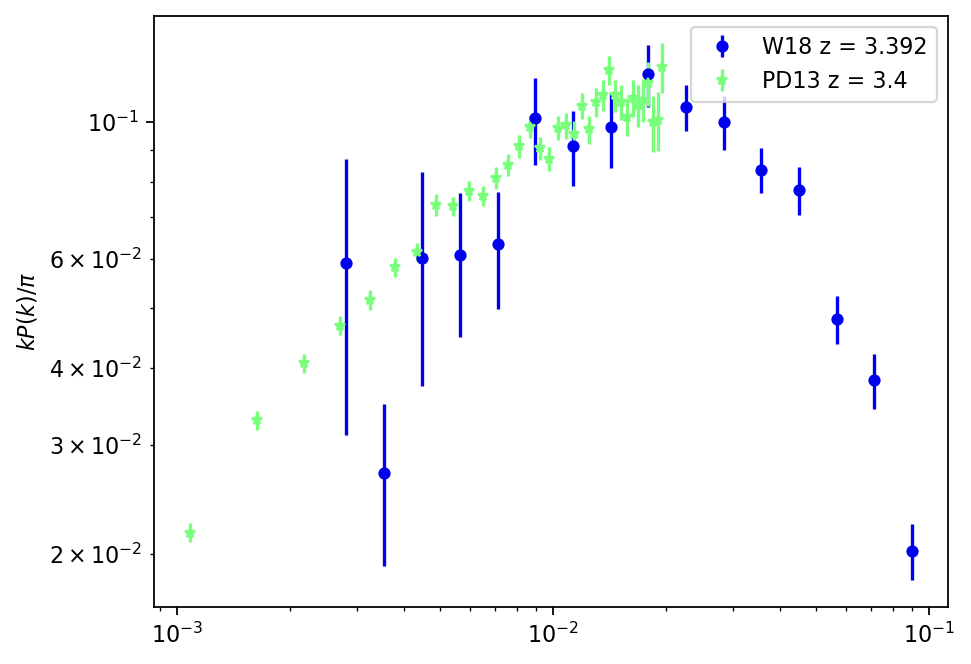

In [13]:
combined_plot(datasets,zmin=3.39,zmax=3.41,kmax=0.11)